# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [7]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [8]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

### **Question 1:** 
- **Check the summary statistics of the data (use the describe function)**
- **Write your observations**

In [10]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- The mpg column has a mean of ~23 miles per galon almost the same as the median.
- We have cars with engines ranging from 3 to 8 cylinders.
- There is high standard deviation in the displacement column.
- The average weight of the cars are around ~2970 lbs.
- The mean and median in the acceleration column is almost the same with ~15.5 seconds.
- The year of the cars are betwen 1970 and 1982.

### **Let's check the distribution and outliers for each column in the data**

### **Question 2:**
- **Create histograms to check the distribution of all the variables (use .hist() attribute) (2 Marks)**
- **Create boxplots to visualize the outliers for all the variables (use sns.boxplot()) (2 Marks)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


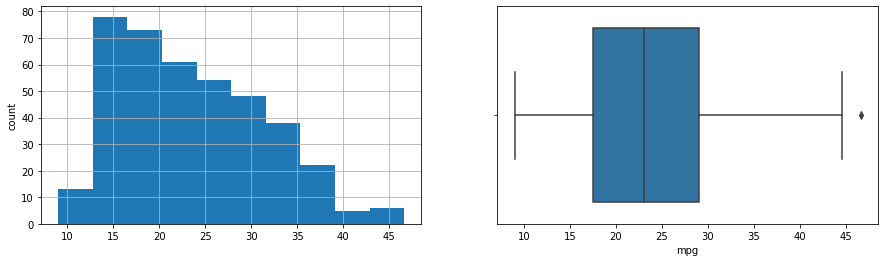

cylinders
Skew : 0.53


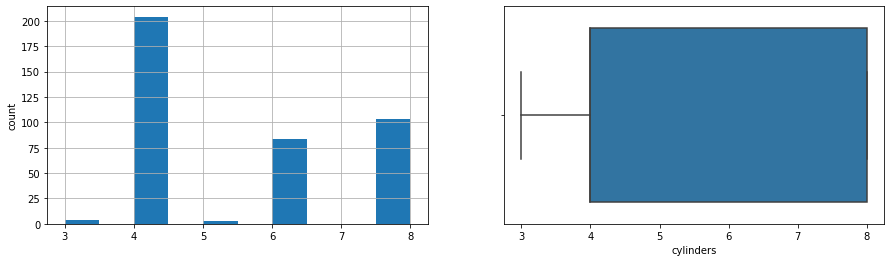

displacement
Skew : 0.72


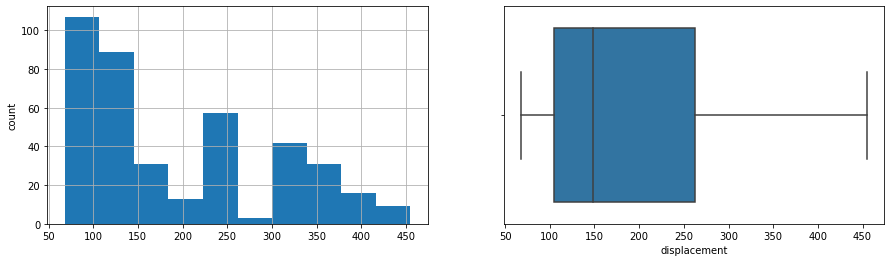

horsepower
Skew : 1.11


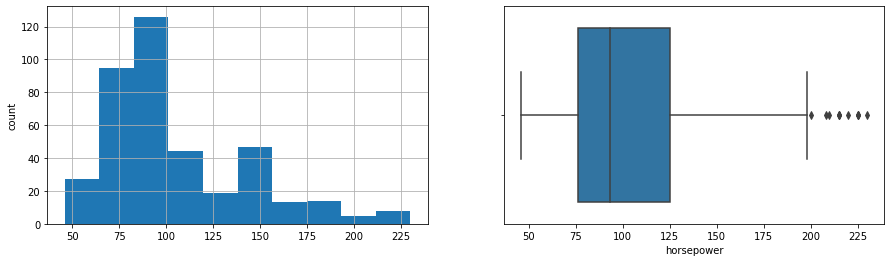

weight
Skew : 0.53


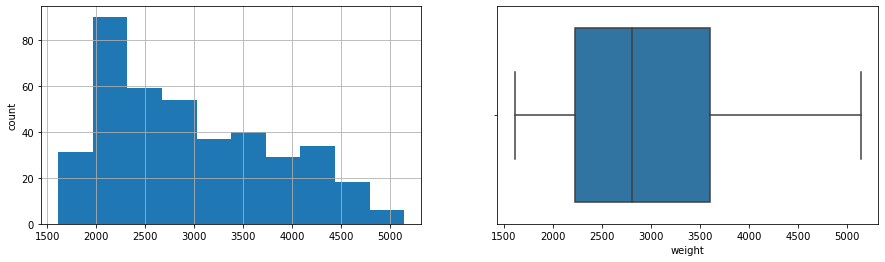

acceleration
Skew : 0.28


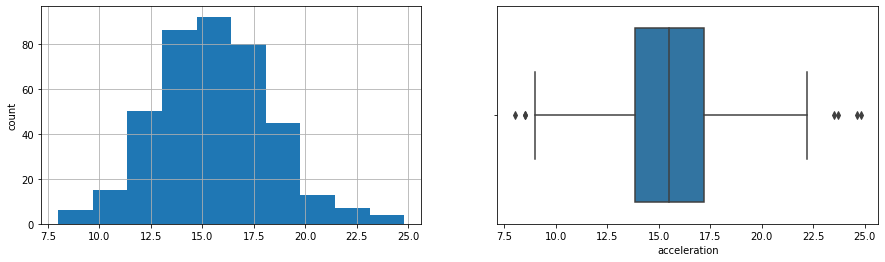

model year
Skew : 0.01


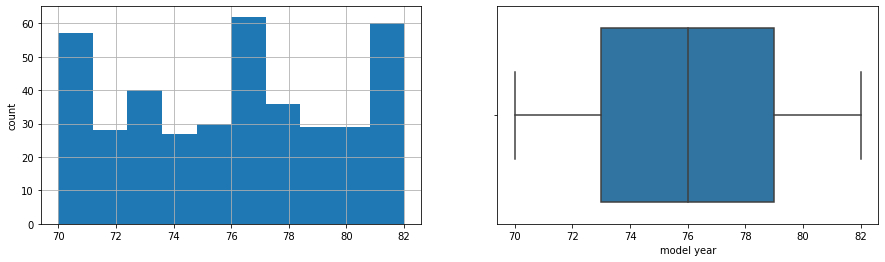

In [11]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**

- There are outliers in mpg, horsepower and acceleration, but they seem te be normal values for each variable.
- The distribution plots shos that mpg, displacement, horsepower and weight variables are right skewed.
- The distribution plot of the acceleration variable follows a normal distribution with few skewness.
- Model year variable distribution plot follows a uniformly shape.
- In the cylinders variable distribution plot it shows that there are only cars with 3, 4, 5, 6 and 8 cylinders.

### **Checking the correlation**

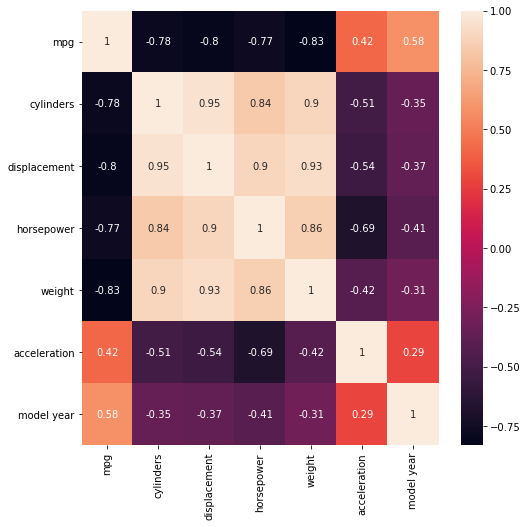

In [12]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [13]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [14]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Question 3:**

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data (2 Marks)**
- **Write your observations on the variance explained by the principal components (2 Marks)**

In [15]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

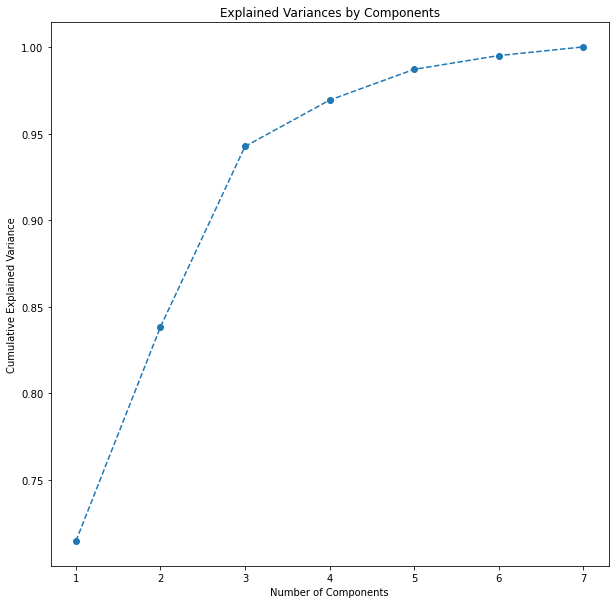

In [16]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [17]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**

- Out of the original 7 features we had in the beginning in our dataset, we have reduced the number of features with PCA to 3 principal components.
- The first three principal components explain around 90% of the original variance.
- We have a loss of a little bit few than 10% in variance.

In [18]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **Question 4: Interpret the coefficients of the first three principal components from the below DataFrame (4 Marks)**

In [19]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

- The first principal component, PC1, seems to be related to high values of components that make a fast car (cylinders, displacement, horsepower), the weight of a car in lbs (weight). It is also associated with low values of the gasoline performance (mpg). **The first prinicpal component seems to capture attributes that generally defined a sports cars with a high value on cylinders, displacement, horsepower and weight, and a low value on the performance of the gasoline with a high speed car.**

- The second principal component, PC2, seems to be related with low value on the year of the model of the car (model year), and no high values. **The second principal component seems to capture the only attribute that define the oldest cars.**

- The third principal component, PC3, seems to be realted with high value on the reaction of the car that measure the time to take from 0 to 60 mph (acceleration), and no low values. **The third principal component seems to capture the only attribute that define a bad performance of a car reaction that is slow on getting from 0 to 60 mph in seconds.**

#### We can also visualize the data in 2 dimensions using the first two principal components 

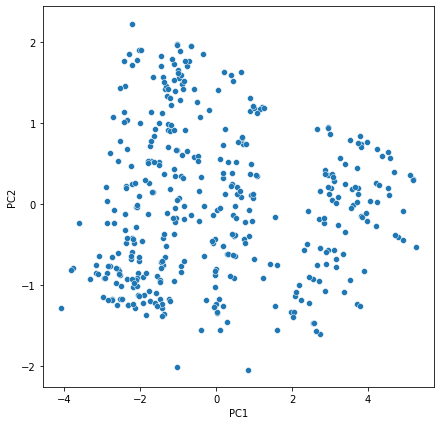

In [20]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

### **Question 5:** 

- **Create a scatter plot for the first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**
- **Hint:** concatenate the DataFrames 'data_pca1' and 'data' on axis = 1

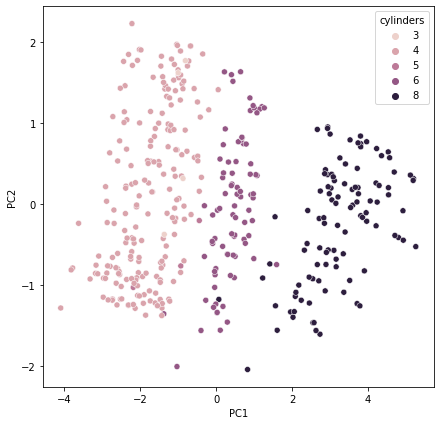

In [21]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x = 0, y = 1, data = df_concat, hue = 'cylinders')   # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**

- With the hue on cylinders we can clearly see 3 groups in the data with most of them with 8, 6 and 4 cylinders.
- There are points mixed in the group of 4 cylinders with points of 3 cylinders and the same with 6 and 5 cylinders.

## t-SNE

### **Question 6:** 
- **Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1) (3 Marks)**
- **Write your observations (2 Marks)**   

In [22]:
tsne = TSNE(n_components = 2, random_state = 1)           # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)    # Fit and transform t-SNE function on the scaled data

In [23]:
data_tsne.shape

(398, 2)

In [24]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [25]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


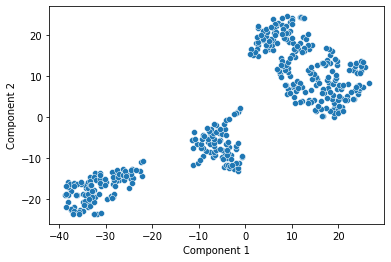

In [26]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

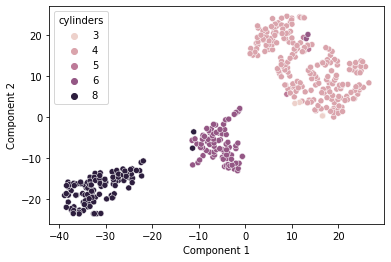

In [27]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:**

- As seen on the PCA, with t-SNE we see also 3 groups, but the difference is that the groups are more clustered or closer between groups.
- With the hue of the cylinders we see the same as with PCA that in the purple group we have data points of 6 and 5 cylinders and in the light color we have 3 and 4 cylinders mixed in the same group.
- The advantage of t-SNE is that we can see more easily the groups that are formed.

In [28]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [29]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

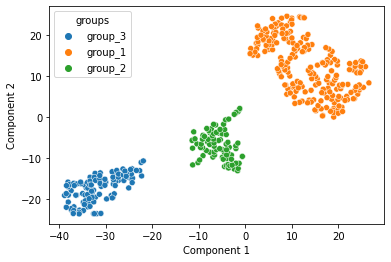

In [30]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [31]:
data['groups'] = data_tsne['groups'] 

### **Question 7:** 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (3 Marks)**

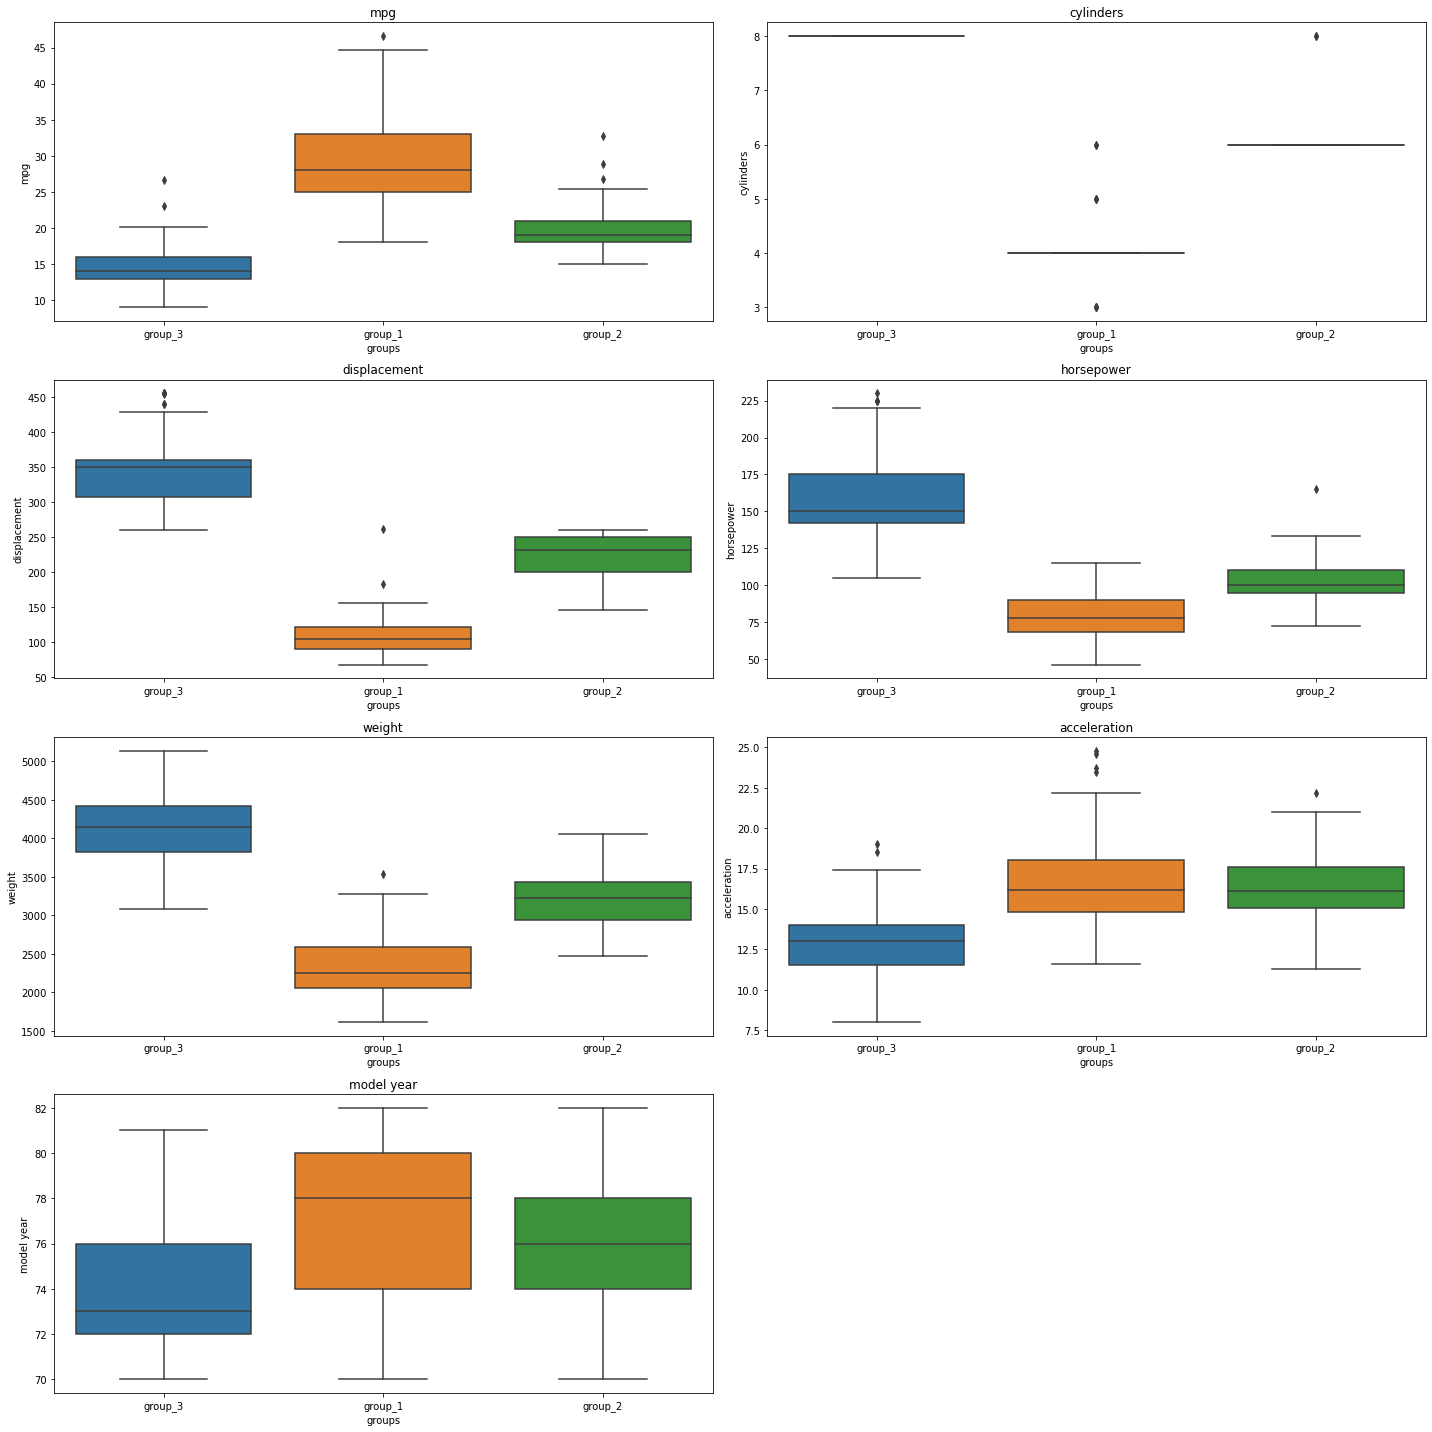

In [32]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(x = data['groups'], y = data[variable])      # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**

- There are three groups in the data. Each group has a different set of characteristics.
- **Group 1 represents the newest low cost model cars**. The low displacement or engine size results in low weight for the cars and low number of cylinders. Also, in this group the cars have the lowest number of cylinders, but the performance on the mpg is the highest.
- **Group 2 represents medium quality model cars**. It have a moderate value on the displacement of the engine, weight, number of cylinders and horsepower. Its acceleration is almost similar to the group 1, and the performance of the fuel is moderate. This group is between group 1 and 3 of the model year.
- **Group 3 represents high quality oldest model cars or sports cars**. This group have high displacement engine, weight, number of cylinders and horsepower. It has low time on accelerating from 0 to 60 mph, and the performance of the fuel is low in this cars due to the speed of them.